In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, pickle
# import yt

In [2]:
from utils.latticeeasy import *
from utils.visualisation_utils import get_opacity
from utils.axionyx_kg import add_EdensRel, get_field_vals
from utils.label_utils import label_blobs, get_labels
from utils.gmon import get_mass
from utils.oscillons import get_oscillon_coms

In [3]:
from matplotlib import rc
import matplotlib as mpl
from matplotlib.colors import ListedColormap
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 9})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Save dir

In [5]:
save_dir = "images_for_paper"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load data

In [121]:
# output_dir = "/home/yangelaxue/Documents/Uni/Masters/LE_Data/alpha_beta-0.05_60"
# output_dir = f"/home/yangelaxue/Documents/Uni/Masters/LE_Data/alpha_beta-0.2_40_forspectra"

# output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_25"
# output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_100"
output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50"

In [122]:
data = LATTICEEASY(output_dir)
data.__dict__

{'output_dir': '/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50',
 'alpha': 0.5,
 'beta': 50.0,
 'phi_0': 0.118201,
 'dt_pr': 0.001,
 'dim': 3,
 'domain_width_pr': array([0.918576, 0.918576, 0.918576]),
 'domain_dimensions': (256, 256, 256),
 't': array([  0.      ,  99.956688, 150.096619, 200.450623, 250.804626,
        301.15863 , 351.512634, 401.866638, 452.220642, 499.999542]),
 '_slice_tidx': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'a': array([ 1.      ,  7.34907 ,  8.705743,  9.801138, 10.73867 , 11.566786,
        12.310488, 12.994849, 13.627013, 14.188194]),
 'ap': array([0.384382  , 0.03100098, 0.02404039, 0.02009995, 0.01752355,
        0.01566523, 0.01425302, 0.013139  , 0.01222268, 0.01150737]),
 'app': array([-1.087656e-01, -1.431982e-04, -9.439238e-05, -8.224508e-05,
        -5.514856e-05, -4.214437e-05, -2.572706e-05, -2.251041e-05,
        -1.934954e-05, -1.577813e-05]),
 'rescale_A': 8.46016531163019,
 'rescale_B': 4.067346132288118e-06,
 'resc

In [123]:
key = f"{data.alpha}_{data.beta}"
key

'0.5_50.0'

In [124]:
mass = get_mass(data.alpha,data.beta)

In [125]:
timeslices = [4]
data.t[timeslices], data.a[timeslices], 

(array([250.804626]), array([10.73867]))

In [126]:
Edens_gen = (data.get_Edens_pr(timeslice) for timeslice in timeslices)
# Edens_pr_means = np.array([Edens_pr.mean() for Edens_pr in Edens_prs])
# Edens_pr_Rel = Edens_pr/Edens_pr_mean

In [127]:
Edens_list = [data.get_Edens_pr(timeslice) for timeslice in timeslices]

In [128]:
xyz = tuple(np.linspace(0,width_pr/data.rescale_B,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
XYZ = np.meshgrid(*xyz,indexing='xy')

# Plot slices

In [130]:
n_means = 4.

idx = 0
Edens = Edens_list[idx]
oscillons = label_blobs(Edens, n_means, 134, True)
labels = get_labels(oscillons)
osc_coms = get_oscillon_coms(Edens, data.domain_width_pr, oscillons, labels)[1]
EdensRel = Edens/Edens.mean()

Removing redundant labels: 100%|██████████████| 115/115 [00:13<00:00,  8.74it/s]
Sifting out small blobs fewer than 134 cells: 100%|█| 14/14 [00:00<00:00, 59.37i
Relabeling blobs in ascending order: 100%|██████| 14/14 [00:00<00:00, 70.46it/s]


In [131]:
osc_coms

[array([0.95361988, 0.92246702, 0.38899107]),
 array([0.82276081, 0.52601487, 0.1172957 ]),
 array([0.16949226, 0.45178594, 0.97328166]),
 array([0.22302261, 0.88181879, 0.56047478]),
 array([0.32611655, 0.66573333, 0.34018197]),
 array([0.35651815, 0.33381218, 0.85695273]),
 array([0.39999229, 0.22224888, 0.69775166]),
 array([0.51999673, 0.90134395, 0.5352366 ]),
 array([0.58910559, 0.44043698, 0.65334755]),
 array([0.61416056, 0.49141752, 0.9048794 ]),
 array([0.66391177, 0.62469117, 0.33855669]),
 array([0.68530584, 0.90698659, 0.52145841]),
 array([0.79912048, 0.19278295, 0.39081286]),
 array([0.85312368, 0.71998498, 0.75044684])]

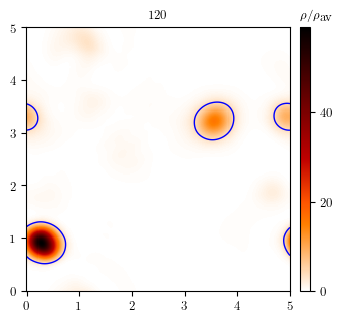

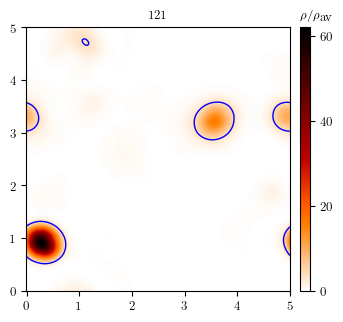

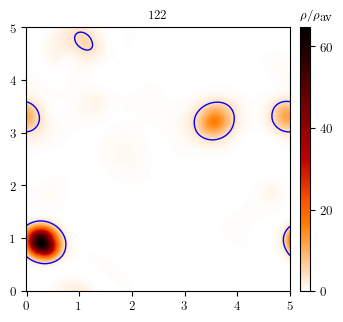

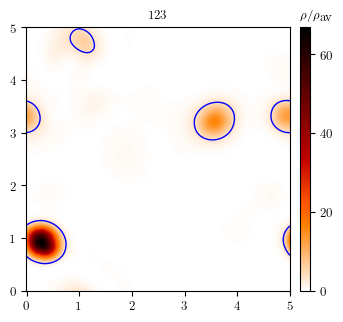

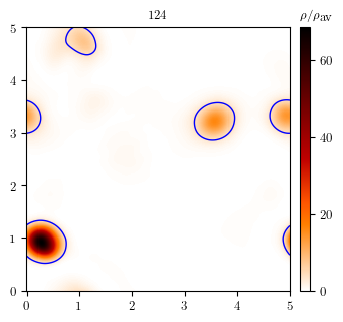

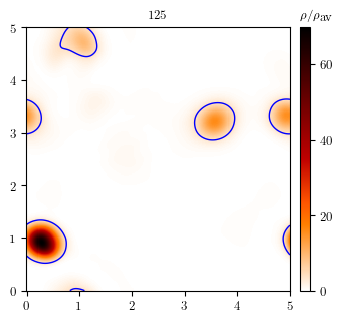

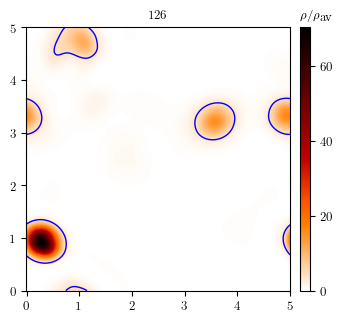

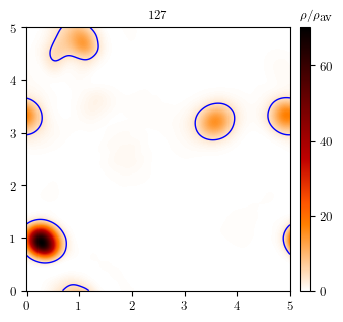

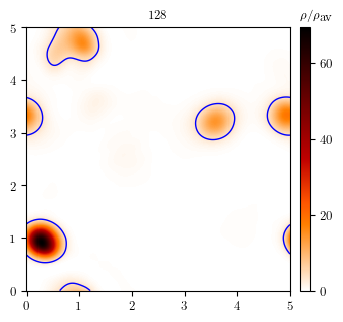

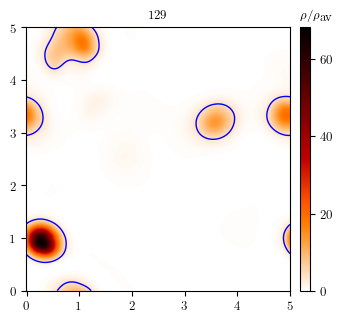

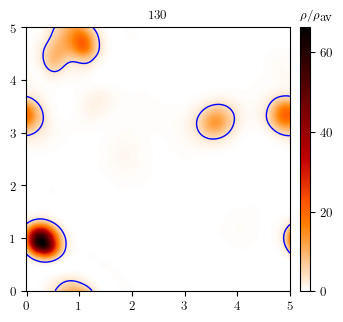

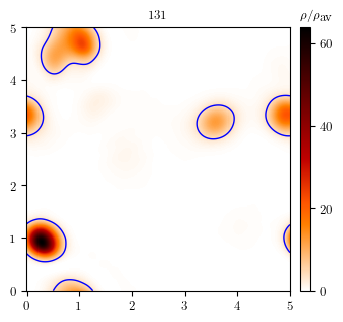

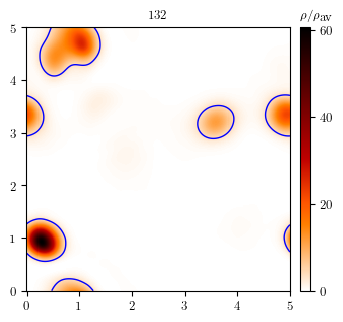

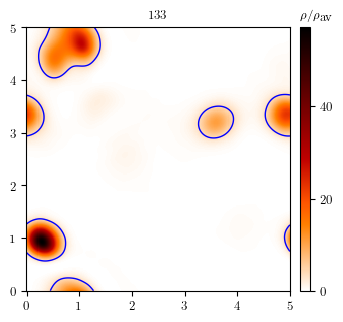

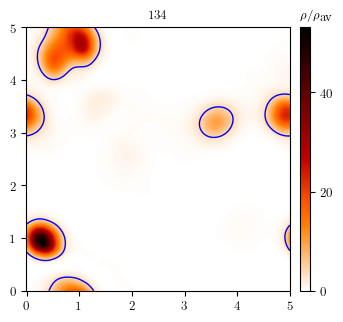

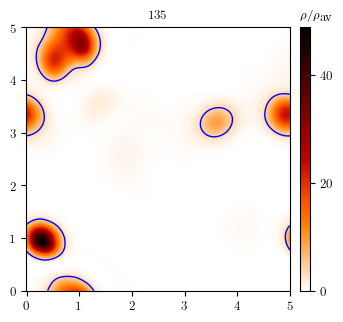

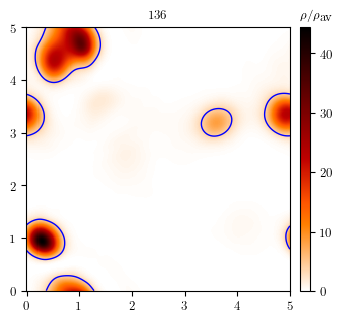

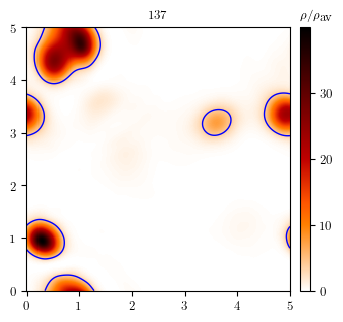

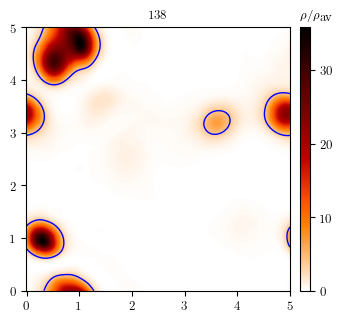

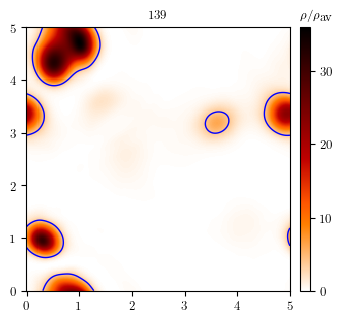

In [171]:
for i in range(120,140,1):
    
    vals = EdensRel[:,i,:]

    fig, ax = plt.subplots(1,1,figsize=(3.5,3.5),tight_layout="True")

    mesh = ax.pcolormesh(xyz[0]*mass,xyz[1]*mass,vals)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=.1, pad=0.1)
    cbar = fig.colorbar(mesh,cax=cax)
    cbar.ax.set_title(r"$\rho/\rho_{\textrm{av}}$",loc='left')
    cbar.ax.set_yticks(cbar.ax.get_yticks()[:-1:2])
    
    ax.set_title(f"{i}")
    ax.contour(xyz[0]*mass,xyz[1]*mass,vals,levels=[n_means],colors='blue',linewidths=1.)

    # ax.set_xlabel(r"$x/(am)$")
    # ax.set_ylabel(r"$y/(am)$")
    ax.set_xticks(ax.get_yticks()[1:-1])
    ax.set_aspect('equal')
    # ax.set_title(fr'$(\alpha,\beta)=${data.alpha,data.beta}, $a=${data.a[timeslices[idx]]}')
    
    plt.show()

# For alpha=.05, beta=25
# for label in [1,2,8,9,10]:
#     if label==1:
#         com = [4.5,.8]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
#     elif label==2:
#         com = [.8, .2]
#         ax.annotate(f"{label}", (com[1],com[0]), c='w')
#     elif label==8:
#         com=[3.1,3.5]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
#     elif label==9:
#         com=[3.3,4.8]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
#     else:
#         com=[3.5,1.6]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')

# For alpha=.5, beta=50
# for label in [1,2,8,9,10]:
#     if label==1:
#         com = [4.5,.8]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
#     elif label==2:
#         com = [.8, .2]
#         ax.annotate(f"{label}", (com[1],com[0]), c='w')
#     elif label==8:
#         com=[3.1,3.5]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
#     elif label==9:
#         com=[3.3,4.8]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
#     else:
#         com=[3.5,1.6]
#         ax.annotate(f"{label}", (com[1],com[0]), c='k')
    
    

# for label, com in zip(labels,osc_coms):
#     if not label in [1,2,8,9,10]:
#         continue
#     com = (com/data.rescale_B*mass)%(max(xyz[0])*mass)
#     print(com)
#     ax.annotate(f"{label}", (com[2],com[0]), c='b')

# if i in [0]:
#     ax.set_ylabel(r"$z$ (pr)")
# if i in [0,1,2,3]:
#     ax.set_xlabel(r"$y$ (pr)")

# plt.savefig(os.path.join(save_dir,f"Edens slice {key} threshold.png"),dpi=400,facecolor='w',bbox_inches='tight')
# plt.show()

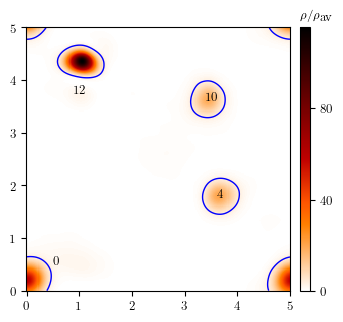

In [168]:
i=105

vals = EdensRel[:,:,i]

fig, ax = plt.subplots(1,1,figsize=(3.5,3.5),tight_layout="True")

mesh = ax.pcolormesh(xyz[0]*mass,xyz[1]*mass,vals)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=.1, pad=0.1)
cbar = fig.colorbar(mesh,cax=cax)
cbar.ax.set_title(r"$\rho/\rho_{\textrm{av}}$",loc='left')
cbar.ax.set_yticks(cbar.ax.get_yticks()[:-1:2])

ax.contour(xyz[0]*mass,xyz[1]*mass,vals,levels=[n_means],colors='blue',linewidths=1.)

# ax.set_xlabel(r"$x/(am)$")
# ax.set_ylabel(r"$y/(am)$")
ax.set_xticks(ax.get_yticks()[1:-1])
ax.set_aspect('equal')
# ax.set_title(fr'$(\alpha,\beta)=${data.alpha,data.beta}, $a=${data.a[timeslices[idx]]}')

# For alpha=.5, beta=50
for i, label in enumerate([0,4,10,12]):
    if i==0:
#         com = osc_coms[label]/data.rescale_B*mass
        com = [0.5,0.5]
        ax.annotate(f"{label}", (com[1],com[0]), c='k')
    elif i==1:
        com = osc_coms[label]/data.rescale_B*mass
        ax.annotate(f"{label}", (com[1],com[0]), c='k')
    elif i==2:
        com = osc_coms[label]/data.rescale_B*mass
        ax.annotate(f"{label}", (com[1],com[0]), c='k')
    else:
#         com = osc_coms[label]/data.rescale_B*mass
        com=[3.75,.9]
        ax.annotate(f"{label}", (com[1],com[0]), c='k')
    
    

# for label, com in zip(labels,osc_coms):
#     if not label in [1,2,8,9,10]:
#         continue
#     com = (com/data.rescale_B*mass)%(max(xyz[0])*mass)
#     print(com)
#     ax.annotate(f"{label}", (com[2],com[0]), c='b')

# if i in [0]:
#     ax.set_ylabel(r"$z$ (pr)")
# if i in [0,1,2,3]:
#     ax.set_xlabel(r"$y$ (pr)")

# plt.savefig(os.path.join(save_dir,f"Edens slice {key} threshold.png"),dpi=400,facecolor='w',bbox_inches='tight')
# plt.show()

In [148]:
np.max(xyz[0]*mass)*105/256

2.05078423616822

In [ ]:
labels=[0,4,10,12]

In [144]:
np.array(osc_coms)/data.rescale_B*mass

array([[5.19075868, 5.02118691, 2.11736231],
       [4.47846456, 2.8632124 , 0.63846581],
       [0.92258292, 2.45916829, 5.29778201],
       [1.21396016, 4.79992989, 3.05078512],
       [1.77512273, 3.62373009, 1.85168384],
       [1.94060516, 1.81701171, 4.66457852],
       [2.17724429, 1.2097486 , 3.79801279],
       [2.83045438, 4.90620954, 2.91340827],
       [3.2066288 , 2.39739346, 3.55631161],
       [3.34300836, 2.67489156, 4.92545375],
       [3.61381495, 3.40032879, 1.84283709],
       [3.73026748, 4.93692363, 2.83841059],
       [4.34978512, 1.04935918, 2.12727866],
       [4.64373621, 3.91903354, 4.084844  ]])

In [94]:
com

array([0.85312368, 0.71998498, 0.75044684])

# Plot volume

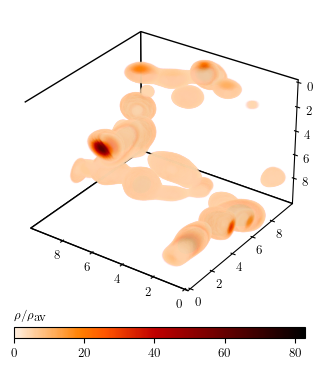

In [100]:
cmap = plt.get_cmap('gist_heat_r')
new_cmap = truncate_colormap(cmap, 0.03, 1.)

fig = plt.figure(figsize=(3.5,4),tight_layout=True)
ax = fig.add_subplot(111,projection='3d')

idx = 0
Edens = Edens_list[idx]
EdensRel = Edens/Edens.mean()

opacity = get_opacity(EdensRel)*.2

where = EdensRel>4
scatter = ax.scatter(*(X[where]*mass for X in XYZ), c=EdensRel[where], alpha=opacity[where], vmin=0, cmap=new_cmap)    
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size=.1, pad=0.2)
# cbar = fig.colorbar(scatter,cax=cax,)
cbar = fig.colorbar(scatter,shrink=.9,pad=.05,aspect=25,orientation="horizontal")
# cbar.ax.set_aspect(20)
cbar.ax.set_title(r"$\rho/\rho_{\textrm{av}}$",loc='left')

# pane_color = (.9, .9, .9, .3)
pane_color = (1, 1, 1, 1)
ax.xaxis.set_pane_color(pane_color)
ax.yaxis.set_pane_color(pane_color)
ax.zaxis.set_pane_color(pane_color)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
# ax.zaxis._axinfo['juggled'] = (1,2,0)
# ax.set_xlabel(r"$x/(am)$", labelpad=-5)
# ax.set_ylabel(r"$y/(am)$", labelpad=-5)
# ax.set_zlabel(r"$z/(am)$", labelpad=-8)
ax.set_xlim(0, xyz[0].max()*mass)
ax.set_ylim(0, xyz[0].max()*mass)
ax.set_zlim(0, xyz[0].max()*mass)
ax.set_xticks(ax.get_xticks()[:-1])
ax.set_yticks(ax.get_xticks())
ax.set_zticks(ax.get_xticks())
ax.grid(False)
# fig.text(-.11,0.05,'f',color='w')
# fig.text(.98,0.1,'f',color='k')

ax.tick_params(axis='both', pad=-3)
# ax.tick_params(axis='z', pad=0)

ax.view_init(-150, 55)

# ax.set_title(fr"$(\alpha,\beta)={data.alpha,data.beta}, a={data.a[timeslices[idx]]}$")

# plt.savefig(os.path.join(save_dir,f"Edens Volume {key}, a{data.a[timeslices[idx]]}.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

# Plot time series of volumes

In [13]:
timeslices = [2]
data.t[timeslices], data.a[timeslices], 

(array([300.152252]), array([12.726228]))

In [14]:
# Edens_list = [data.get_Edens_pr(timeslice) for timeslice in timeslices]

# Edens_gen = (pickle.load(open(os.path.join(output_dir,f"Edens {data.t[timeslice]}.p"),'rb')) for timeslice in timeslices)

Edens_list = []

for timeslice in timeslices:
    
    print(timeslice)
    
    if os.path.exists(os.path.join(output_dir,f"Edens {data.t[timeslice]}.p")):
        Edens_list.append(pickle.load(open(os.path.join(output_dir,f"Edens {data.t[timeslice]}.p"),'rb')))
    else:
        Edens_list.append(data.get_Edens_pr(timeslice))
#         pickle.dump(Edens_list[-1],open(os.path.join(output_dir,f"Edens {data.t[timeslice]}.p"),'wb'))

2


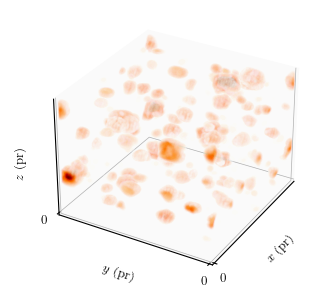

In [12]:
xyz = tuple(np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
XYZ = np.meshgrid(*xyz,indexing='xy')

fig, ax = plt.subplots(1,1,figsize=(3,4),tight_layout=True,subplot_kw={'projection': '3d'})

idx = 0
n_means_def = 4
Edens = Edens_list[idx]

opacity = get_opacity(Edens)*1/4
c = Edens

gist_heat_r = mpl.colormaps['gist_heat_r']
gist_heat_r_sample = ListedColormap(gist_heat_r(np.linspace(0.0, 1, 128)))

# c = c*(1/4)+3/4

n_means = n_means_def
where = np.where(Edens>Edens.mean()*n_means)
while np.array(where).size==0:
    n_means -= 1
    where = np.where(Edens>Edens.mean()*n_means)

scatter = ax.scatter(*(X[where] for X in XYZ), c=c[where], alpha=opacity[where], s=1,cmap=gist_heat_r_sample)


# cbar = fig.colorbar(scatter,shrink=.5,pad=.18)
# cbar.ax.set_title(r"$\rho/\langle\rho\rangle$")
# # cbar = fig.colorbar(scatter,shrink=.6,pad=.1,aspect=25)
# # # cbar.ax.set_aspect(20)

ax.set_xlabel(r"$x$ (pr)",labelpad=-4)
ax.set_ylabel(r"$y$ (pr)",labelpad=-4)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$z$ (pr)",labelpad=-6,rotation=90)
ax.view_init(30,-150)

# color = (.0, .0, .0, 1.)
color = (.98, .98, .98, 1.)
ax.xaxis.set_pane_color(color)
ax.yaxis.set_pane_color(color)
ax.zaxis.set_pane_color(color)
lw = .5
ax.xaxis._axinfo["grid"].update({"linewidth":lw})
ax.yaxis._axinfo["grid"].update({"linewidth":lw})
ax.zaxis._axinfo["grid"].update({"linewidth":lw})
ax.set_xticks([0,1,2,3])
ax.set_yticks([0,1,2,3])
ax.set_zticks([0,1,2,3])
ax.set_xlim(-data.domain_width_pr[0]*.0,data.domain_width_pr[0]*1.0)
ax.set_ylim(-data.domain_width_pr[1]*.0,data.domain_width_pr[1]*1.0)
ax.set_zlim(-data.domain_width_pr[2]*.0,data.domain_width_pr[2]*1.0)
ax.tick_params(axis='both', which='major', pad=-2)
# fig.text(1,0.4,'f',color='w')
fig.text(-.05,0.4,'f',color='w')

# plt.savefig(os.path.join(save_dir,f"Edens Volume {key} a={data.a[timeslices[idx]]}.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

In [57]:
np.array(where)[0].size

613877

In [ ]:
xyz = tuple(np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
XYZ = np.meshgrid(*xyz,indexing='xy')

# fig = plt.figure(figsize=(6.3,9),tight_layout=True)
# ax = fig.add_subplot(231,projection='3d')

n_means_def = 4

for idx, Edens in enumerate(Edens_list):
    
    print(idx)
    
    fig, ax = plt.subplots(1,1,figsize=(3,3),tight_layout=True,subplot_kw={'projection': '3d'})
    
    EdensRel = Edens/Edens.mean()
    opacity = get_opacity(EdensRel)*.2

    n_means = n_means_def
    where = np.array(Edens>Edens.mean()*n_means)
    while where.sum()==0:
        n_means -= 1
        where = np.array(Edens>Edens.mean()*n_means)

    scatter = ax.scatter(*(X[where] for X in XYZ), c=EdensRel[where], alpha=opacity[where])    
    
    
    cbar = fig.colorbar(scatter,shrink=.7,pad=.18)
    cbar.ax.set_title(r"$\rho/\langle\rho\rangle$")
# # cbar = fig.colorbar(scatter,shrink=.6,pad=.1,aspect=25)
# # # cbar.ax.set_aspect(20)


    ax.xaxis.set_pane_color((.95, .95, .95, .1))
    ax.yaxis.set_pane_color((.95, .95, .95, .1))
    ax.zaxis.set_pane_color((.95, .95, .95, .1))
#         ax.set_box_aspect(None, zoom=.75)
    ax.set_xlabel(r"$x$ (pr)",labelpad=-5)
    ax.set_ylabel(r"$y$ (pr)",labelpad=-5)
    ax.set_zlabel(r"$z$ (pr)",labelpad=-5)
    ax.set_xlim(-data.domain_width_pr[0]*.05,data.domain_width_pr[0]*1.05)
    ax.set_ylim(-data.domain_width_pr[1]*.05,data.domain_width_pr[1]*1.05)
    ax.set_zlim(-data.domain_width_pr[2]*.05,data.domain_width_pr[2]*1.05)
    ax.set_title(fr"$\rho/\langle\rho\rangle>$ {n_means}, $a=$ {data.a[timeslices][idx]}",y=1.05)
    ax.tick_params(axis='both', which='major', pad=-3)
    
    plt.savefig(os.path.join(save_dir,f"Edens Volume timeseries_{idx} alpha_beta-{data.alpha}_{data.beta}.png"),dpi=400,facecolor='w',bbox_inches='tight')
    plt.show()

In [ ]:
xyz = tuple(np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
XYZ = np.meshgrid(*xyz,indexing='xy')

# fig = plt.figure(figsize=(6.3,9),tight_layout=True)
# ax = fig.add_subplot(231,projection='3d')

n_means_def = 4

fig, axes = plt.subplots(3,2,figsize=(6.3,8),constrained_layout=True,subplot_kw={'projection': '3d'})

idx = 0

for i, _axes in enumerate(axes):
    for j, ax in enumerate(_axes):
        
        print(idx)
        
#         Edens = Edens_list[idx]
        Edens = next(Edens_gen)
#         if idx<5:
#             Edens = Edens_list[1]
#         else:
#             Edens = Edens_list[-1]

        EdensRel = Edens/Edens.mean()
        opacity = get_opacity(EdensRel)*.2
        
        n_means = n_means_def
        where = np.array(Edens>Edens.mean()*n_means)
        while where.sum()==0:
            n_means -= 1
            where = np.array(Edens>Edens.mean()*n_means)
        
        scatter = ax.scatter(*(X[where] for X in XYZ), c=EdensRel[where], alpha=opacity[where])    
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size=.1, pad=0.1)
        cbar = fig.colorbar(scatter,shrink=.7,pad=.18)
        cbar.ax.set_title(r"$\rho/\langle\rho\rangle$")
# # cbar = fig.colorbar(scatter,shrink=.6,pad=.1,aspect=25)
# # # cbar.ax.set_aspect(20)
        

        ax.xaxis.set_pane_color((.95, .95, .95, .1))
        ax.yaxis.set_pane_color((.95, .95, .95, .1))
        ax.zaxis.set_pane_color((.95, .95, .95, .1))
#         ax.set_box_aspect(None, zoom=.75)
        ax.set_xlabel(r"$x$ (pr)",labelpad=-5)
        ax.set_ylabel(r"$y$ (pr)",labelpad=-5)
        ax.set_zlabel(r"$z$ (pr)",labelpad=-5)
        ax.set_xlim(-data.domain_width_pr[0]*.05,data.domain_width_pr[0]*1.05)
        ax.set_ylim(-data.domain_width_pr[1]*.05,data.domain_width_pr[1]*1.05)
        ax.set_zlim(-data.domain_width_pr[2]*.05,data.domain_width_pr[2]*1.05)
        ax.set_title(fr"$\rho/\langle\rho\rangle>$ {n_means}, $a=$ {data.a[timeslices][idx]}",y=1.05)
        ax.tick_params(axis='both', which='major', pad=-3)
        
        idx += 1

# plt.subplots_adjust(
# #     left=0.1,
# #     bottom=0.1,
# #     right=0.9,
# #     top=0.9,
#     wspace=1,
#     hspace=2,
# )
        
plt.savefig(os.path.join(save_dir,f"Edens Volume timeseries alpha_beta-{data.alpha}_{data.beta}.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

In [ ]:
xyz = tuple(np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
XYZ = np.meshgrid(*xyz,indexing='xy')

fig = plt.figure(figsize=(6,6),tight_layout=True)
ax = fig.add_subplot(111,projection='3d')

# Edens = Edens_list[-1]
EdensRel = Edens/Edens.mean()
opacity = get_opacity(EdensRel)*.2

where = Edens>Edens.mean()*4
scatter = ax.scatter(*(X[where] for X in XYZ), c=EdensRel[where], alpha=opacity[where])    
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size=.1, pad=0.2)
# cbar = fig.colorbar(scatter,cax=cax,)
cbar = fig.colorbar(scatter,shrink=.6,pad=.1,aspect=25)
# cbar.ax.set_aspect(20)
cbar.ax.set_title(r"$\rho/\langle\rho\rangle$")

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, .1))
ax.set_xlabel(r"$x$ (pr)")
ax.set_ylabel(r"$y$ (pr)")
ax.set_zlabel(r"$z$ (pr)")

# plt.savefig(os.path.join(save_dir,f"Edens Volume alpha_beta-{data.alpha}_{data.beta}, a{data.a[timeslices[-1]]}.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

# Count oscillons

In [ ]:
Edens = data.get_Edens_pr(timeslices[-1])
EdensRel = Edens/Edens.mean()

In [ ]:
n_means = 4
min_n_cells = np.floor(0.02**3*np.product(data.domain_dimensions))

oscillons = label_blobs(EdensRel,n_means,min_n_cells,True)

In [ ]:
labels = get_labels(oscillons)
labels, len(labels)